# NN with softmax & cross-entropy [THEORY]

source: https://stackabuse.com/creating-a-neural-network-from-scratch-in-python-multi-class-classification/

### SoftMax

* Using softmax on the output layer, ensures that all out output probabilities sum to 1
* It is by far more common to use for multiclass classification problems
* It takes a vector as input and produces another vector of same lenght as output.
* Softmax simply divides the exponent of each input element by the sum of exponents of all the input elements

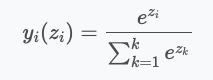

MAIN ADVANTAGES OF SOFTMAX:
* It takes a vector as input
* produces output between 0 and 1 (this is valuable as in the process of feedfoward the output can be greater than 1). It makes softmax the ideal choice


### Cross-entropy

* Mathmeticaly it is simply the sum of the products of all the actual probabilities with the negative log of predicted probabilities
* It outperforms GD on multi-class classification problems

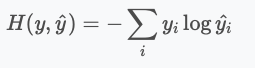

### Feed Foward

* we will use sigmoid fuction for the hidden layers, but use softmax only on the output layer activation

#### Phase 1

* calculating output from a hidden layer, for each node, we multiply the input with the weights of the hidden layer node, and add a bias term. 
* we pass this doc product through the sigmoid function to get the value

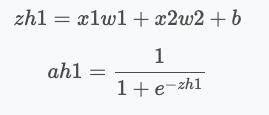

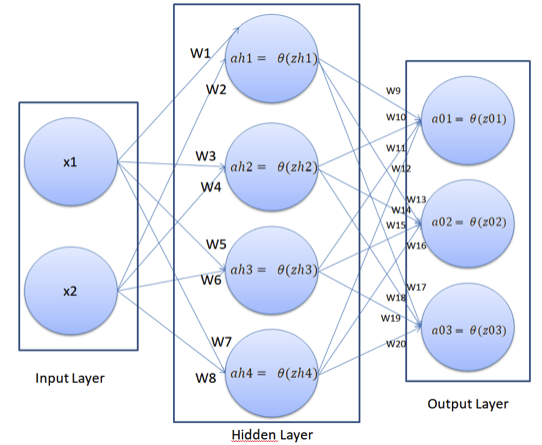

#### Phase 2

* we take the value from the hidden layer nodes, and calculate the output layer. 
* we multiply the outputs with the weights and pass it through softmax

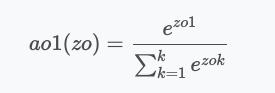

### Back Propagation

The idea is simple, we define a cost function that we want to optimize by updating the weights. We will use cross entorpy for this. 

We use GD to find the minumum of our cost function 
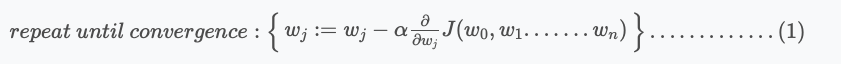

#### Phase 1

* We have to update the weights such that they minimize the cost function, by taking the derivative of the cost function in respect to each weight 

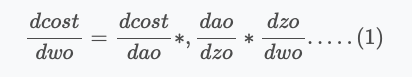

* the values we get from equation 1, need to be multiplied by the learning rate, and substracted from current weights values

* we need to do the same for our bias term, so we nede to update it, by calculating the cost function compared to the biase, and update it

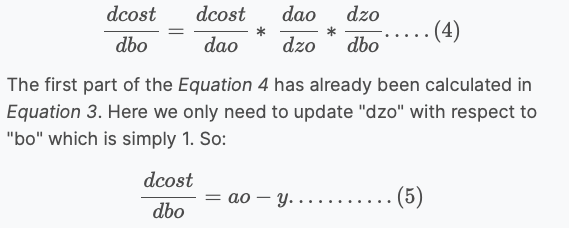

* we do the same as with the weights, we multiply the results of this derivative and then multiply it by the learning rate, and substrace from the current bias value to update it

#### Phase 2

* We have to back propages the error to theprevious layers and find new weights for the hidder layers weights 

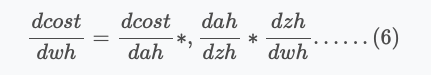

* we do the same for bias in the hidden layer

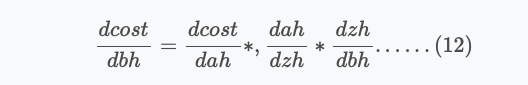

# NN with softmax & cross-entropy [IRIS]

In [134]:
### libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [96]:
data = pd.read_csv("Iris.csv")
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [97]:
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


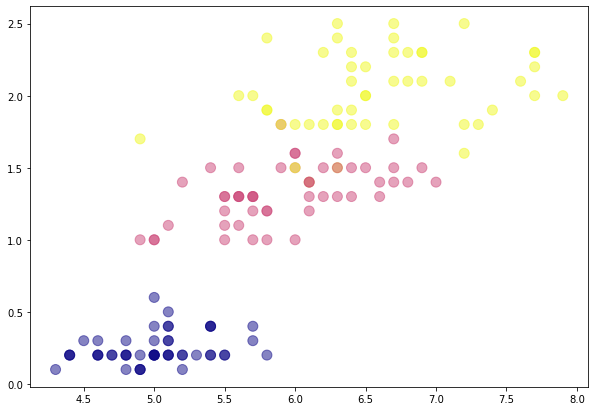

In [98]:
### we are taking the column 'species' and encoding the value depending on the type
data.loc[data["Species"]=="Iris-setosa","Species"]=0
data.loc[data["Species"]=="Iris-versicolor","Species"]=1
data.loc[data["Species"]=="Iris-virginica","Species"]=2

### shuffling the data
data=data.iloc[np.random.permutation(len(data))]

### assiging the data values to the variables we will be using in the functions
feature_set = data.iloc[:,1:5].values
labels = data.iloc[:,5].values

plt.figure(figsize=(10,7))
plt.scatter(feature_set[:,0], feature_set[:,3], c=labels, cmap='plasma', s=100, alpha=0.5)
plt.show()

In [99]:
one_hot_labels = np.zeros((150, 3))

In [100]:
feature_set.shape

(150, 4)

In [101]:
for i in range(150):
    one_hot_labels[i, labels[i]] = 1

In [102]:
one_hot_labels.shape

(150, 3)

In [130]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x) *(1-sigmoid (x))

def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

instances = feature_set.shape[0]
attributes = feature_set.shape[1]
hidden_nodes = 4
output_labels = 3

### initializing randomly the weights and biases for hidden layers
wh = np.random.rand(attributes,hidden_nodes)
bh = np.random.randn(hidden_nodes)

### initializing randomly the weights and biases for output layer
### setting learning rate
wo = np.random.rand(hidden_nodes,output_labels)
bo = np.random.randn(output_labels)
lr = 0.001

### list that saves the errors per epoch?
error_cost = []


### defining 50,000 ephochs
for epoch in range(50000):
    
### Step 1: feedforward
    # calculating the dot product of our input layer with weights and biases
    # This is done for the hidden layer
    zh = np.dot(feature_set, wh) + bh
    ah = sigmoid(zh)

    # calculating the dot product of our hidden layer with weights and biases to get the output values
    zo = np.dot(ah, wo) + bo
    ao = softmax(zo)

### Step 2: Back Propagation

    # Calculating the error term
    dcost_dzo = ao - one_hot_labels
    dzo_dwo = ah

    dcost_wo = np.dot(dzo_dwo.T, dcost_dzo)

    dcost_bo = dcost_dzo

########## Phases 2

    dzo_dah = wo
    dcost_dah = np.dot(dcost_dzo , dzo_dah.T)
    dah_dzh = sigmoid_der(zh)
    dzh_dwh = feature_set
    dcost_wh = np.dot(dzh_dwh.T, dah_dzh * dcost_dah)

    dcost_bh = dcost_dah * dah_dzh

    # Update Weights ================

    wh -= lr * dcost_wh
    bh -= lr * dcost_bh.sum(axis=0)

    wo -= lr * dcost_wo
    bo -= lr * dcost_bo.sum(axis=0)

    if epoch % 200 == 0:
        loss = np.sum(-one_hot_labels * np.log(ao))
        print('Loss function value: ', loss)
        error_cost.append(loss)
        
        
### look into nanograd

Loss function value:  210.27715620280674
Loss function value:  77.40474014139507
Loss function value:  47.517922036815136
Loss function value:  29.346989746709408
Loss function value:  21.197042427823334
Loss function value:  17.108931849810993
Loss function value:  14.753173198424065
Loss function value:  13.24854561841305
Loss function value:  12.213611927396355
Loss function value:  11.461599348541776
Loss function value:  10.891731908201377
Loss function value:  10.445360246034298
Loss function value:  10.086245218530113
Loss function value:  9.79088645600744
Loss function value:  9.54342722238025
Loss function value:  9.33280743676341
Loss function value:  9.151092703736413
Loss function value:  8.992451904857038
Loss function value:  8.852508933164122
Loss function value:  8.727918787037868
Loss function value:  8.616082808590777
Loss function value:  8.514952801114886
Loss function value:  8.42289341738169
Loss function value:  8.33858364772957
Loss function value:  8.2609450946

Loss function value:  6.59320669686357
Loss function value:  6.591060194778035
Loss function value:  6.58892620149734
Loss function value:  6.586804649514928
Loss function value:  6.584695471042295
Loss function value:  6.58259859804668
Loss function value:  6.5805139622922475
Loss function value:  6.578441495375063
Loss function value:  6.576381128758208
Loss function value:  6.5743327938041976
Loss function value:  6.572296421806439
Loss function value:  6.570271944017944
Loss function value:  6.568259291679609
Loss function value:  6.566258396045643
Loss function value:  6.564269188409294
Loss function value:  6.562291600125907
Loss function value:  6.56032556263451
Loss function value:  6.558371007479297
Loss function value:  6.556427866330244
Loss function value:  6.554496070999316
Loss function value:  6.552575553460549
Loss function value:  6.550666245865738
Loss function value:  6.548768080558953
Loss function value:  6.546880990093534
Loss function value:  6.545004907243885
Lo

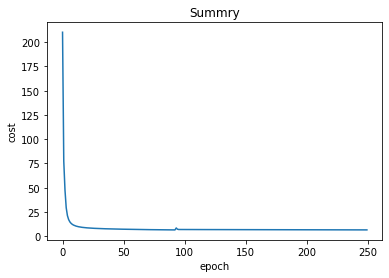

In [133]:
import matplotlib.pyplot as plt
# visualization of error terms with learning rate of 0.01
plt.plot(error_cost)
plt.title('Summry')
plt.xlabel('epoch')
plt.ylabel('cost')
plt.show()